### 데이터 가져오기

In [5]:
file = '../DATA/2023년 연료원별 시간대별 설비용량 및 전력거래량 (1).xlsx'
import pandas as pd

df = pd.read_excel(file, sheet_name='Sheet1', skiprows=5)
print(df.head())

       거래일자  시간  연료원  설비용량(MW)  전력거래량(MWh)
0  20230101   1  원자력     24650       19561
1  20230101   2  원자력     24650       19561
2  20230101   3  원자력     24650       19562
3  20230101   4  원자력     24650       19560
4  20230101   5  원자력     24650       19559


In [ ]:
# %pip install openpyxl

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179208 entries, 0 to 179207
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   거래일자        179208 non-null  int64 
 1   시간          179208 non-null  int64 
 2   연료원         179208 non-null  object
 3   설비용량(MW)    179208 non-null  int64 
 4   전력거래량(MWh)  179208 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 6.8+ MB


### 거래일자 + 시간

In [8]:
# 거래일자 열과 시간 열을 합치기 
# - 시간 단위가 int, 합치면 202301012, 2023010112 이런 식으로 자릿수가 달라짐
# - 시간 단위를 2자리로 맞추기 위해 zfill() 함수 사용
df['거래일자'] = df['거래일자'].astype(str)
df['시간'] = df['시간'].astype(str)
df['날짜시간'] = df['거래일자'] + df['시간'].str.zfill(2)
print(df.head())

       거래일자 시간  연료원  설비용량(MW)  전력거래량(MWh)        날짜시간
0  20230101  1  원자력     24650       19561  2023010101
1  20230101  2  원자력     24650       19561  2023010102
2  20230101  3  원자력     24650       19562  2023010103
3  20230101  4  원자력     24650       19560  2023010104
4  20230101  5  원자력     24650       19559  2023010105


In [11]:
# 날짜 시간 열을 인덱스로 설정
df.set_index('날짜시간', inplace=True)
print(df.head())

                거래일자 시간  연료원  설비용량(MW)  전력거래량(MWh)
날짜시간                                              
2023010101  20230101  1  원자력     24650       19561
2023010102  20230101  2  원자력     24650       19561
2023010103  20230101  3  원자력     24650       19562
2023010104  20230101  4  원자력     24650       19560
2023010105  20230101  5  원자력     24650       19559


In [17]:
# 연료원별 구분, 연료원 열 제외
nuclear_df = df[df['연료원'] == '원자력'].drop(['연료원', '거래일자', '시간'], axis=1)
nuclear_df.head()

,설비용량(MW),전력거래량(MWh)
날짜시간,,
2023010101,24650,19561
2023010102,24650,19561
2023010103,24650,19562
2023010104,24650,19560
2023010105,24650,19559


In [19]:
# 모든 연료원 확인
df['연료원'].unique()

array(['원자력', '유연탄', '무연탄', '바이오가스', '부생가스', '수력', '양수', '매립가스', '중유',
       '태양광', '폐기물', '풍력', 'LNG', '연료전지', '경유', '해양에너지', '바이오매스', 'IGCC',
       '바이오중유', '기타', '바이오SRF'], dtype=object)

<hr> 

### 자료가 가격과 거리가 멀어 새로운 자료 찾음 

- 전력거래 계통한계가격 가중평균 SMP.csv
<hr>

In [53]:
import pandas as pd

file = '../DATA/HOME_전력거래_계통한계가격_가중평균SMP.csv'

df = pd.read_csv(file, encoding='cp949', skiprows=1)
df.tail()

,Unnamed: 0,육지,제주,통합,Unnamed: 4
271,2001/08,0.0,0.0,42.293200,17.694454
272,2001/07,0.0,0.0,47.428339,18.058702
273,2001/06,0.0,0.0,51.247385,18.256079
274,2001/05,0.0,0.0,52.552364,18.597789
275,2001/04,0.0,0.0,50.705398,18.514828


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  276 non-null    object 
 1   육지          276 non-null    float64
 2   제주          276 non-null    float64
 3   통합          276 non-null    float64
 4   Unnamed: 4  276 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.9+ KB


In [55]:
# 첫 열을 인덱스로 설정, 육지, 제주, 통합을 시각화
df.set_index('Unnamed: 0', inplace=True)
df.head()

,육지,제주,통합,Unnamed: 4
Unnamed: 0,,,,
2024/03,134.40,140.61,134.47,0.0
2024/02,119.49,122.34,119.53,0.0
2024/01,137.91,150.67,138.06,0.0
2023/12,131.05,137.04,131.12,0.0
2023/11,120.82,123.37,120.85,0.0


In [56]:
# 넷 째 열 = BLMP
df.columns = ['육지', '제주', '통합', 'BLMP']
df.head()

,육지,제주,통합,BLMP
Unnamed: 0,,,,
2024/03,134.40,140.61,134.47,0.0
2024/02,119.49,122.34,119.53,0.0
2024/01,137.91,150.67,138.06,0.0
2023/12,131.05,137.04,131.12,0.0
2023/11,120.82,123.37,120.85,0.0


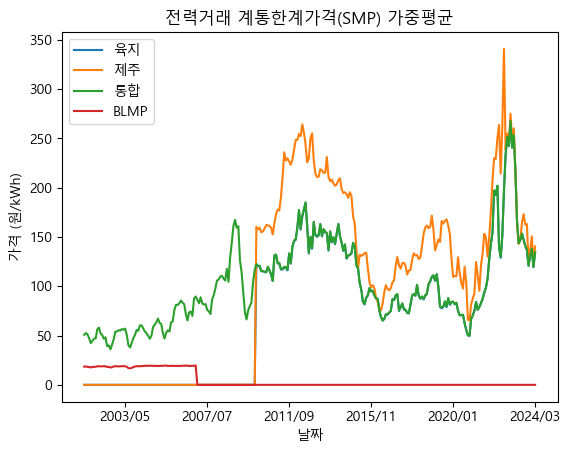

In [57]:
# 시각화
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
df.plot()
# 좌우 반전
plt.gca().invert_xaxis()
plt.xlabel('날짜')
plt.ylabel('가격 (원/kWh)')
plt.title('전력거래 계통한계가격(SMP) 가중평균')
plt.show()

=> 계통가격은 육지보다 제주가 높고 2015년 감소했다가 21년도부터 다시 증가, 최근 감소하는 추세이다. 통합 가격은 육지와 거의 동일하므로 데이터가 온전한 통합 가격을 사용한다.  
=> 설명할 땐 SMP는 유동적인 예측수요를 만족하는 한계 발전기의 발전 가격이고, 가중평균으로 해당 기간의 시세를 표현할 수 있다 판단한다.

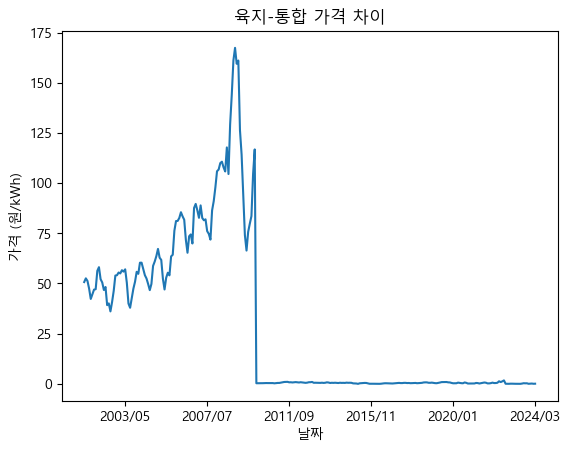

In [58]:
# 추가) 육지와 통합의 차이
# 2010년 1월 1일부터 자료를 총합내기
df['육지-통합'] = abs(df['육지'] - df['통합'])
df['육지-통합'].plot()
plt.gca().invert_xaxis()
plt.xlabel('날짜')
plt.ylabel('가격 (원/kWh)')
plt.title('육지-통합 가격 차이')
plt.show()

### 

### 데이터 저장

In [59]:
# 데이터 저장
# - 인덱스를 컬럼으로 변환, 날짜로 변경 및 형식을 datetime으로 변경
df.reset_index(inplace=True)
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])
# 이름을 날짜로 변경
df.rename(columns={'Unnamed: 0': '날짜'}, inplace=True)
df.head()

C:\Users\wjs31\AppData\Local\Temp\ipykernel_14896\2254758324.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])


,날짜,육지,제주,통합,BLMP,육지-통합
0,2024-03-01,134.40,140.61,134.47,0.0,0.07
1,2024-02-01,119.49,122.34,119.53,0.0,0.04
2,2024-01-01,137.91,150.67,138.06,0.0,0.15
3,2023-12-01,131.05,137.04,131.12,0.0,0.07
4,2023-11-01,120.82,123.37,120.85,0.0,0.03


In [60]:
# - 파일 저장 : 날짜와 통합 가격만 저장, 역순 정렬
final_df = df[['날짜', '통합']].sort_values('날짜', ascending=True)
# 날짜를 인덱스로 지정
final_df.set_index('날짜', inplace=True)
final_df.head(10)


,통합
날짜,
2001-04-01,50.705398
2001-05-01,52.552364
2001-06-01,51.247385
2001-07-01,47.428339
2001-08-01,42.293200
2001-09-01,44.540669
2001-10-01,46.931304
2001-11-01,47.139051
2001-12-01,56.284392


In [61]:
final_df.to_csv('../DATA/SMP_201004_202403.csv', encoding='utf-8-sig')